# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [1]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
#load and inspect the data
df = pd.read_csv('reg_data.csv')
# YOUR CODE HERE
#raise NotImplementedError()
df

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [5]:
assert df.shape == (100,2)

<AxesSubplot:xlabel='X', ylabel='Y'>

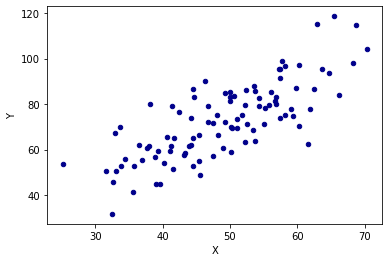

In [18]:
#plot the data (scatter)
# YOUR CODE HERE
df.plot.scatter(x = 'X', y = 'Y', c='DarkBlue')
#plt.show()
#raise NotImplementedError()

In [58]:
# YOUR CODE HERE

x_train, x_test , y_train, y_test = train_test_split(df['X'],df['Y'],test_size=0.2, random_state=0)

#raise NotImplementedError()

In [55]:
x_train

40    44.555608
72    46.682229
56    41.377727
36    61.896223
51    44.502538
        ...    
86    51.088720
23    41.575643
13    58.168471
11    54.351635
28    46.737619
Name: X, Length: 80, dtype: float64

In [56]:
assert x_train.shape == (80,)
assert x_test.shape == (20,)
assert y_train.shape == (80,)
assert y_test.shape == (20,)

In [112]:
#implement a least squares function to find a, b

x_mean = 0
y_mean = 0
b_upper = 0
b_lower = 0
b = 0
a = 0

# YOUR CODE HERE
x_mean = x_train.mean()
y_mean = y_train.mean()

for i in range(len(x_train)):
    b_upper += (x_train.values[i] - x_mean) * (y_train.values[i] - y_mean)
    b_lower += (x_train.values[i] - x_mean)**2

b = b_upper/b_lower 
a = y_mean - b * x_mean  
#raise NotImplementedError()
print(b)
print(a)

1.3450919020620415
6.687439682550206


In [73]:
assert abs(a) <=0.03
assert abs(b - 1.32) <=0.03

AssertionError: 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74]


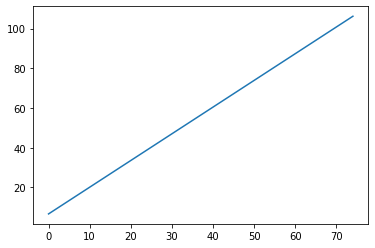

In [89]:
line = 0
x = np.array([])
# YOUR CODE HERE
x = np.arange(0,75)
function = b*x + a  
plt.plot(function)
print(x)
#raise NotImplementedError()

In [116]:
assert abs(a +3*b - 11.69) <= 0.05
assert abs(a +100*b - 140) <= 1

AssertionError: 

In [ ]:
# YOUR CODE HERE

raise NotImplementedError()

In [76]:
#Separate your test data in to classes
#if the Y value for a certain X is lower than the line then the class is 0
class_0 = []
class_1 = []

# YOUR CODE HERE
#raise NotImplementedError()
for i in range(len(x_test)):
    if y_test.values[i] < (b * x_test.values[i] + a):
        class_0.append((x_test.values[i],y_test.values[i]))
    else:
        class_1.append((x_test.values[i],y_test.values[i]))



class_0 = np.array(class_0)
class_1 = np.array(class_1)
print(class_0.shape)
print(class_1.shape)

(11, 2)
(9, 2)


In [78]:
class_0

array([[51.0887199 , 69.58889785],
       [61.53035803, 62.5623823 ],
       [55.0780959 , 71.13972786],
       [43.10782022, 57.81251298],
       [51.08863468, 73.43464155],
       [55.80573336, 79.55043668],
       [58.16847072, 75.39287043],
       [39.29956669, 59.17148932],
       [52.22399609, 63.35879032],
       [47.48120861, 57.25181946],
       [51.84518691, 75.38065167]])

In [77]:
assert 9 < class_0.shape[0] < 13
assert 7 < class_1.shape[0] < 11

In [82]:
class_0

array([[51.0887199 , 69.58889785],
       [61.53035803, 62.5623823 ],
       [55.0780959 , 71.13972786],
       [43.10782022, 57.81251298],
       [51.08863468, 73.43464155],
       [55.80573336, 79.55043668],
       [58.16847072, 75.39287043],
       [39.29956669, 59.17148932],
       [52.22399609, 63.35879032],
       [47.48120861, 57.25181946],
       [51.84518691, 75.38065167]])

In [95]:
x_train

43    43.870613
62    52.378446
3     47.475640
71    53.660932
45    32.669044
        ...    
96    49.239765
67    57.362052
64    33.644706
47    53.575078
44    62.997481
Name: X, Length: 80, dtype: float64

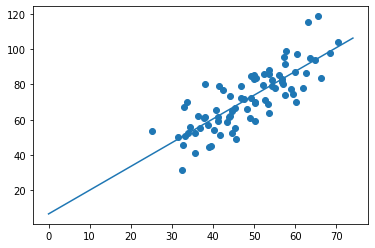

In [94]:
# YOUR CODE HERE
plt.plot(function)
plt.scatter(x_train,y_train)



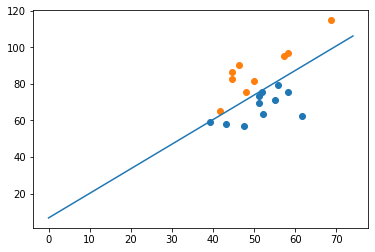

In [97]:
plt.scatter(class_0[:,0], class_0[:,1])
plt.scatter(class_1[:,0], class_1[:,1])
plt.plot(function)

In [122]:
# get the total error for the classes

err = 0

for i in range(len(x_test)):
    err += abs(y_test.values[i] - ( b* x_test.values[i] + a))
# YOUR CODE HERE
#raise NotImplementedError()
err

201.8244786064339

In [99]:
assert err - 201 < 20